## This notebook focuses on the second part of the PatientOmics framework:

The aim is to organizing clinical time-series data for analysis and visualization, inwhich we perform the following tasks:

1. Execute a script to generate the initial matrix containing clinical features for 116 patients, specifically on the first day of hospitalization.

2. Visualize the correlation among laboratory features for potential long COVID patients (N = 116) on their first day of hospitalization, by:
        a. Grouping features based on their laboratory families.
        b. Sorting features by their average similarity distances.

3. Create a cluster map to visualize data patterns among potential long COVID patients (N = 116).

4. Structuring this notebook to add the data preparation functions to transform a pandas dataframe into X and y numpy arrays that can be used to create a TSDataset.
    - https://timeseriesai.github.io/tsai/data.preparation.html



https://github.com/tslearn-team/tslearn

https://github.com/timeseriesAI/tsai

https://github.com/timeseriesAI/tsai/blob/main/tutorial_nbs/15_PatchTST_a_new_transformer_for_LTSF.ipynb

    

In [98]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

## Get the clinical features for all patients at one time point (e.g. 1st day of hospitalization)

In [28]:
## Get the clinical features for all patients at one time point (e.g. 1st day of hospitalization)

import os
import pandas as pd

# Read the list of unique patient IDs
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
df = pd.read_csv(filename, sep=',', header=0)

# Initialize an empty list to store patient DataFrames
patient_dfs = []

## Set the day to be selected
days_col = 7  

# Iterate through the patient IDs
for patient_id in df['pseudoid_pid']:
    dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
    filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

    try:
        # Read the CSV file into a DataFrame for each patient
        df_lab = pd.read_csv(filename, sep=',', header=0)

        # Get the row features for a specific day in 'days' column (e.g., 'days' == 0)
        df_lab_selected_day = df_lab[df_lab['days'] == days_col].copy()

        # Add a column 'patient_id' into the df_lab_selected_day
        df_lab_selected_day['patient_id'] = patient_id

        # Append the patient DataFrame to the list
        patient_dfs.append(df_lab_selected_day)

    except Exception as e:
    # except FileNotFoundError:
        print(f"Error reading patient {patient_id}: {str(e)}")
        continue

# Concatenate all patient DataFrames into one
collection_df = pd.concat(patient_dfs, ignore_index=True)

# Save the resulting DataFrame as a CSV file
output_csv_path = dir_path + '116_plcp_lab_markers_day-' + str(days_col) +'.csv'
collection_df.to_csv(output_csv_path, index=False)

## Add data imputation for missing values (e.g., mean, median, mode, etc.) using sklearn.impute.SimpleImputer, according to the day before and after the missing value


In [6]:
# ## Add data imputation for missing values (e.g., mean, median, mode, etc.) using sklearn.impute.SimpleImputer, according to the day before and after the missing value

# import os
# import pandas as pd

# # Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# # Initialize an empty list to store patient DataFrames
# patient_dfs = []

# ## Set the day to be selected
# days_col = 1  

# # Iterate through the patient IDs
# for patient_id in df['pseudoid_pid']:
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

#     try:
#         # Read the CSV file into a DataFrame for each patient
#         df_lab = pd.read_csv(filename, sep=',', header=0)

#         # Get the row features for a specific day in 'days' column (e.g., 'days' == 0)
#         df_lab_selected_day = df_lab[df_lab['days'] == days_col].copy()

#         df_lab_day_before = df_lab[df_lab['days'] == days_col-1].copy()
#         df_lab_day_after = df_lab[df_lab['days'] == days_col+1].copy()

#         ## Add data imputation for missing values using sklearn.impute.SimpleImputer, according to the day before and after the missing value
#         df_lab_data_imputation =
        

#         # Append the patient DataFrame to the list
#         patient_dfs.append(df_lab_selected_day)

#     except Exception as e:
#     # except FileNotFoundError:
#         print(f"Error reading patient {patient_id}: {str(e)}")
#         continue

# # Concatenate all patient DataFrames into one
# collection_df = pd.concat(patient_dfs, ignore_index=True)

# # Save the resulting DataFrame as a CSV file
# output_csv_path = dir_path + '116_plcp_lab_markers_day-' + str(days_col) +'.csv'
# collection_df.to_csv(output_csv_path, index=False)

In [49]:
# import os
# import pandas as pd
# from sklearn.impute import SimpleImputer


# def impute_missing_values(df_lab_selected_day, df_lab_day_before, df_lab_day_after, columns_to_impute):
#     """Function for data imputation using sklearn.impute.SimpleImputer, according to the day before and after the missing value"""

#     for column in columns_to_impute:
#         # Find missing values for the selected day
#         missing_indices = df_lab_selected_day[column].isna()
        
#         # Impute missing values based on the day before and after
#         for index, value in enumerate(missing_indices):
#             if value:
#                 before_value = df_lab_day_before.iloc[index][column]
#                 after_value = df_lab_day_after.iloc[index][column]
#                 df_lab_selected_day.at[index, column] = imputer.fit_transform([[before_value, after_value]])[0, 0]

#     return df_lab_selected_day


# # Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# # Initialize an empty list to store patient DataFrames
# patient_dfs = []

# # Set the day to be selected
# selected_day = 0

# # Initialize SimpleImputer with your preferred strategy (e.g., 'mean', 'median', or 'most_frequent')
# imputer = SimpleImputer(strategy='mean') 


# # Iterate through the patient IDs
# for patient_id in df['pseudoid_pid']:
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

#     try:
#         ## Read the CSV file into a DataFrame for each patient
#         df_lab = pd.read_csv(filename, sep=',', header=0)

#         ## Get the row features for a specific day in 'days' column (e.g., 'days' == 0)
#         df_lab_day_selected = df_lab[df_lab['days'] == selected_day].copy()

#         ## Get the row features from 'df_lab' for the day following seven days after the selected day

#         ## Get the row features from 'df_lab' for the day before and after the selected day
#         df_lab_day_before = df_lab[df_lab['days'] == selected_day + 1].copy()
#         df_lab_day_after = df_lab[df_lab['days'] == selected_day + 2].copy()
        
        
#         ## Get the columns to impute from the dataframe df_lab_day_selected
#         columns_to_impute = df_lab_day_selected.columns[2:-1].tolist()
#         # columns_to_impute = ['ALAT', 'ASAT', 'Basophile', 'C-reaktives Protein', 'Eosinophile', 'Erythrozyten', 'G-Glutamyltransferase', 'Glucose', 'Hämatokrit', 'Hämoglobin', 'INR', 'Immature Granulozyten', 'Kalium', 'LDH nach IFCC', 'Lactat arteriell', 'Leukozyten', 'Lymphozyten', 'MCH', 'MCHC', 'MCV', 'Monozyten', 'Natrium', 'Neutrophile', 'Neutrophile Granulozyten', 'Normoblasten maschinell', 'RDW', 'Thrombozyten', 'eGFR nach CKD-EPI']
#         print('columns_to_impute: ', columns_to_impute)

#         ## Apply data imputation
#         df_lab_day_selected = impute_missing_values(df_lab_day_selected, df_lab_day_before, df_lab_day_after, columns_to_impute)

#         # Add a column 'patient_id' into the df_lab_selected_day
#         df_lab_day_selected['patient_id'] = patient_id

#         # Append the patient DataFrame to the list
#         patient_dfs.append(df_lab_day_selected)

#     except Exception as e:
#         print(f"Error reading patient {patient_id}: {str(e)}")
#         continue

# # Concatenate all patient DataFrames into one
# collection_df = pd.concat(patient_dfs, ignore_index=True)

# # Save the resulting DataFrame as a CSV file
# output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{days_col}.csv')
# collection_df.to_csv(output_csv_path, index=False)

In [99]:
# import os
# import pandas as pd
# from sklearn.impute import SimpleImputer

# def impute_missing_values(df_lab_selected_day, df_lab_day_after, columns_to_impute):
#     """Function for data imputation using sklearn.impute.SimpleImputer, based on the day after the missing value"""

#     for column in columns_to_impute:
#         # Find missing values for the selected day
#         missing_indices = df_lab_selected_day[column].isna()

#         # Impute missing values based on the day after
#         for index, value in enumerate(missing_indices):
#             if value:
#                 after_value = df_lab_day_after.iloc[index][column]
#                 df_lab_selected_day.at[index, column] = after_value

#     return df_lab_selected_day

# # Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# # Initialize an empty list to store patient DataFrames
# patient_dfs = []

# # Set the day to be selected
# selected_day = 10

# # Initialize SimpleImputer with your preferred strategy (e.g., 'mean', 'median', or 'most_frequent')
# imputer = SimpleImputer(strategy='mean')

# # Iterate through the patient IDs
# for patient_id in df['pseudoid_pid']:
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

#     try:
#         # Read the CSV file into a DataFrame for each patient
#         df_lab = pd.read_csv(filename, sep=',', header=0)

#         # Get the row features for a specific day in 'days' column (e.g., 'days' == 0)
#         df_lab_day_selected = df_lab[df_lab['days'] == selected_day].copy()

#         # Get the row features from 'df_lab' for the day following seven days after the selected day
#         df_lab_day_after = df_lab[df_lab['days'].between(selected_day + 1, selected_day + 7)].copy()

#         # Get the columns to impute from the dataframe df_lab_day_selected
#         columns_to_impute = df_lab_day_selected.columns[2:-1].tolist()
#         # print('columns_to impute:', columns_to_impute)

#         # Apply data imputation
#         df_lab_day_selected = impute_missing_values(df_lab_day_selected, df_lab_day_after, columns_to_impute)

#         # Add a column 'patient_id' into the df_lab_selected_day
#         df_lab_day_selected['patient_id'] = patient_id

#         # Append the patient DataFrame to the list
#         patient_dfs.append(df_lab_day_selected)

#     except Exception as e:
#         print(f"Error reading patient {patient_id}: {str(e)}")
#         continue

# # Concatenate all patient DataFrames into one
# collection_df = pd.concat(patient_dfs, ignore_index=True)

# # Save the resulting DataFrame as a CSV file
# output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{selected_day}.csv')
# collection_df.to_csv(output_csv_path, index=False)


In [71]:
# ## Data imputation for missing values from a range of days
#### Having Issues for index 0 out of bounds for axis 0 with size 0

# import os
# import pandas as pd
# from sklearn.impute import SimpleImputer

# def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute):
#     """Function for data imputation using sklearn.impute.SimpleImputer, based on a range of days"""
#     imputer = SimpleImputer(strategy='mean')
    
#     for column in columns_to_impute:
#         for index, row in df_lab_selected_day.iterrows():
#             if pd.isna(row[column]):
#                 available_values = df_lab_days[df_lab_days['days'] == row['days'] + 1][column].tolist()
#                 if available_values:
#                     imputed_value = imputer.fit_transform([available_values])[0, 0]
#                     df_lab_selected_day.at[index, column] = imputed_value

#     return df_lab_selected_day

# # Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# # Initialize an empty list to store patient DataFrames
# patient_dfs = []

# # Set the day range to be selected
# # init_day = 0
# # end_day = 7

# init_day = 8
# end_day = 15

# # Iterate through the patient IDs
# for patient_id in df['pseudoid_pid']:
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

#     try:
#         # Read the CSV file into a DataFrame for each patient
#         df_lab = pd.read_csv(filename, sep=',', header=0)

#         # Get the row features from 'df_lab' for the selected day range
#         df_lab_days = df_lab[df_lab['days'].between(init_day, end_day)].copy()

#         # Get the columns to impute from the dataframe df_lab_days
#         columns_to_impute = df_lab_days.columns[2:-1].tolist()

#         # Iterate through the selected days
#         for selected_day in range(init_day, end_day + 1):
#             # Get the row features for a specific day in 'days' column
#             df_lab_day_selected = df_lab_days[df_lab_days['days'] == selected_day].copy()

#             # Apply data imputation for the selected day
#             df_lab_day_selected = impute_missing_values(df_lab_day_selected, df_lab_days, columns_to_impute)

#             # Add a column 'patient_id' into the df_lab_day_selected
#             df_lab_day_selected['patient_id'] = patient_id

#             # Append the patient DataFrame to the list
#             patient_dfs.append(df_lab_day_selected)

#     except Exception as e:
#         print(f"Error reading patient {patient_id}: {str(e)}")
#         continue

# # Concatenate all patient DataFrames into one
# collection_df = pd.concat(patient_dfs, ignore_index=True)

# # Save the resulting DataFrame as a CSV file
# output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}.csv')
# collection_df.to_csv(output_csv_path, index=False)

## Baseline method for data imputation for missing values from a range of days

In [76]:
# ## Baseline method for data imputation for missing values from a range of days

# import os
# import pandas as pd
# from sklearn.impute import SimpleImputer

# def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute):
#     """Function for data imputation using sklearn.impute.SimpleImputer, based on a range of days"""
#     imputer = SimpleImputer(strategy='mean')
    
#     for column in columns_to_impute:
#         if not df_lab_selected_day[column].isna().all():
#             for index, row in df_lab_selected_day.iterrows():
#                 if pd.isna(row[column]):
#                     available_values = df_lab_days[df_lab_days['days'] == row['days'] + 1][column].tolist()
#                     if available_values:
#                         imputed_value = imputer.fit_transform([available_values])[0, 0]
#                         df_lab_selected_day.at[index, column] = imputed_value

#     return df_lab_selected_day

# # Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# # Initialize an empty list to store patient DataFrames
# patient_dfs = []

# # Set the day range to be selected
# init_day = 0
# end_day = 7

# # Iterate through the patient IDs
# for patient_id in df['pseudoid_pid']:
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

#     try:
#         # Read the CSV file into a DataFrame for each patient
#         df_lab = pd.read_csv(filename, sep=',', header=0)

#         # Get the row features from 'df_lab' for the selected day range
#         df_lab_days = df_lab[df_lab['days'].between(init_day, end_day)].copy()

#         # Get the columns to impute from the dataframe df_lab_days
#         columns_to_impute = df_lab_days.columns[2:-1].tolist()

#         # Iterate through the selected days
#         for selected_day in range(init_day, end_day + 1):
#             # Get the row features for a specific day in 'days' column
#             df_lab_day_selected = df_lab_days[df_lab_days['days'] == selected_day].copy()

#             # Apply data imputation for the selected day
#             df_lab_day_selected = impute_missing_values(df_lab_day_selected, df_lab_days, columns_to_impute)

#             # Add a column 'patient_id' into the df_lab_day_selected
#             df_lab_day_selected['patient_id'] = patient_id

#             # Append the patient DataFrame to the list
#             patient_dfs.append(df_lab_day_selected)

#     except Exception as e:
#         print(f"Error reading patient {patient_id}: {str(e)}")
#         continue

# # Concatenate all patient DataFrames into one
# collection_df = pd.concat(patient_dfs, ignore_index=True)

# # Save the resulting DataFrame as a CSV file
# output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}.csv')
# collection_df.to_csv(output_csv_path, index=False)

Error reading patient 1001048: [Errno 2] No such file or directory: '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/patient_1001048.csv'


In [82]:
import os
import pandas as pd

def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute):
    """Function for data imputation using substitution method"""

    imputed_values = []  # Store imputed values
    
    for column in columns_to_impute:
        if not df_lab_selected_day[column].isna().all():
            for index, row in df_lab_selected_day.iterrows():
                if pd.isna(row[column]):
                    # Find the nearest available value from days after the missing day
                    next_day_values = df_lab_days[df_lab_days['days'] > row['days']].sort_values(by='days')
                    if not next_day_values.empty:
                        next_day_value = next_day_values.iloc[0][column]
                        df_lab_selected_day.at[index, column] = next_day_value
                        imputed_values.append(next_day_value)
                    else:
                        # If no values are available from days after, use the nearest available value from days before
                        prev_day_values = df_lab_days[df_lab_days['days'] < row['days']].sort_values(by='days', ascending=False)
                        if not prev_day_values.empty:
                            prev_day_value = prev_day_values.iloc[0][column]
                            df_lab_selected_day.at[index, column] = prev_day_value
                            imputed_values.append(prev_day_value)
    
    return df_lab_selected_day, imputed_values

# Read the list of unique patient IDs
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
df = pd.read_csv(filename, sep=',', header=0)

# Initialize an empty list to store patient DataFrames
patient_dfs = []

# Set the day range to be selected
init_day = 0
end_day = 7

# Initialize a list to store all imputed values
all_imputed_values = []

# Iterate through the patient IDs
for patient_id in df['pseudoid_pid']:
    dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
    filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

    try:
        # Read the CSV file into a DataFrame for each patient
        df_lab = pd.read_csv(filename, sep=',', header=0)

        # Get the row features from 'df_lab' for the selected day range
        df_lab_days = df_lab[df_lab['days'].between(init_day, end_day)].copy()

        # Get the columns to impute from the dataframe df_lab_days
        columns_to_impute = df_lab_days.columns[2:-1].tolist()

        # Iterate through the selected days
        for selected_day in range(init_day, end_day + 1):
            # Get the row features for a specific day in 'days' column
            df_lab_day_selected = df_lab_days[df_lab_days['days'] == selected_day].copy()

            # Apply data imputation for the selected day
            df_lab_day_selected, imputed_values = impute_missing_values(df_lab_day_selected, df_lab_days, columns_to_impute)
            all_imputed_values.extend(imputed_values)  # Append imputed values to the list

            # Add a column 'patient_id' into the df_lab_day_selected
            df_lab_day_selected['patient_id'] = patient_id

            # Append the patient DataFrame to the list
            patient_dfs.append(df_lab_day_selected)

    except Exception as e:
        print(f"Error reading patient {patient_id}: {str(e)}")
        continue

# Concatenate all patient DataFrames into one
collection_df = pd.concat(patient_dfs, ignore_index=True)

# Save the resulting DataFrame as a CSV file
output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}.csv')
collection_df.to_csv(output_csv_path, index=False)

# Save the imputed values to a separate file if needed
imputed_values_file = os.path.join(dir_path, f'116_plcp_lab_imputed_values.csv')
pd.Series(all_imputed_values).to_csv(imputed_values_file, index=False, header=['Imputed_Values'])


Error reading patient 1001048: [Errno 2] No such file or directory: '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/patient_1001048.csv'


## Data imputation for missing values from a range of days using KNNImputer

In [86]:
# ## Data imputation for missing values from a range of days using KNNImputer

# import os
# import pandas as pd
# from sklearn.impute import KNNImputer

# def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute, n_neighbors=7):
#     """Function for data imputation using KNNImputer"""
    
#     imputer = KNNImputer(n_neighbors=n_neighbors)
#     imputed_values = imputer.fit_transform(df_lab_selected_day[columns_to_impute])
    
#     # Update the missing values in the selected day DataFrame
#     df_lab_selected_day[columns_to_impute] = imputed_values
    
#     return df_lab_selected_day

# # Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# # Initialize an empty list to store patient DataFrames
# patient_dfs = []

# # Set the day range to be selected
# init_day = 0
# end_day = 7

# # Iterate through the patient IDs
# for patient_id in df['pseudoid_pid']:
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

#     try:
#         # Read the CSV file into a DataFrame for each patient
#         df_lab = pd.read_csv(filename, sep=',', header=0)

#         # Get the row features from 'df_lab' for the selected day range
#         df_lab_days = df_lab[df_lab['days'].between(init_day, end_day)].copy()

#         # Get the columns to impute from the dataframe df_lab_days
#         columns_to_impute = df_lab_days.columns[2:-1].tolist()

#         # Iterate through the selected days
#         for selected_day in range(init_day, end_day + 1):
#             # Get the row features for a specific day in 'days' column
#             df_lab_day_selected = df_lab_days[df_lab_days['days'] == selected_day].copy()

#             # Apply data imputation for the selected day using KNNImputer
#             df_lab_day_selected = impute_missing_values(df_lab_day_selected, df_lab_days, columns_to_impute, n_neighbors=7)

#             # Add a column 'patient_id' into the df_lab_day_selected
#             df_lab_day_selected['patient_id'] = patient_id

#             # Append the patient DataFrame to the list
#             patient_dfs.append(df_lab_day_selected)

#     except Exception as e:
#         print(f"Error reading patient {patient_id}: {str(e)}")
#         continue

# # Concatenate all patient DataFrames into one
# collection_df = pd.concat(patient_dfs, ignore_index=True)

# # Save the resulting DataFrame as a CSV file
# output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}.csv')
# collection_df.to_csv(output_csv_path, index=False)

## This version cotains an Error reading patient 1000037: Columns must be same length as key

In [117]:


# # def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute, n_neighbors=2):
# #     """Function for data imputation using KNNImputer"""
# #
# #     imputer = KNNImputer(n_neighbors=n_neighbors)
# #     imputed_values = imputer.fit_transform(df_lab_selected_day[columns_to_impute])
# #    
# #     # Update the missing values in the selected day DataFrame
# #     df_lab_selected_day.loc[:, columns_to_impute] = imputed_values
# #    
# #     return df_lab_selected_day

# # def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute, n_neighbors=2):
# #     """Function for data imputation using KNNImputer"""
# #
# #     imputer = KNNImputer(n_neighbors=n_neighbors)
# #    
# #     # Create a copy of the selected day DataFrame to avoid modifying the original
# #     df_lab_selected_day_copy = df_lab_selected_day.copy()
# #
# #     # Apply imputation only to the specified columns
# #     df_lab_selected_day_copy[columns_to_impute] = imputer.fit_transform(df_lab_selected_day_copy[columns_to_impute])
# #    
# #     return df_lab_selected_day_copy


# # def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute, n_neighbors=2):
# #     """Function for data imputation using KNNImputer"""
# #
# #     imputer = KNNImputer(n_neighbors=n_neighbors)
# #    
# #     # Apply imputation to the entire DataFrame
# #     imputed_values = imputer.fit_transform(df_lab_selected_day[columns_to_impute])
# #    
# #     # Replace the original DataFrame with imputed values
# #     df_lab_selected_day[columns_to_impute] = imputed_values
# #    
# #     return df_lab_selected_day



# import os
# import pandas as pd
# from sklearn.impute import KNNImputer



# def impute_missing_values(df_lab_selected_day, df_lab_days, columns_to_impute, n_neighbors=2):
#     """Function for data imputation using KNNImputer"""

#     # Combine both DataFrames to ensure consistent columns and indices
#     combined_df = pd.concat([df_lab_selected_day, df_lab_days], axis=0)

#     imputer = KNNImputer(n_neighbors=n_neighbors)

#     # Apply imputation to the entire combined DataFrame
#     imputed_values = imputer.fit_transform(combined_df[columns_to_impute])

#     # Update the imputed values in the selected day DataFrame
#     df_lab_selected_day[columns_to_impute] = imputed_values[:len(df_lab_selected_day)]
    
#     return df_lab_selected_day


# # Read the list of unique patient IDs
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
# df = pd.read_csv(filename, sep=',', header=0)

# # Initialize an empty list to store patient DataFrames
# patient_dfs = []

# # Set the day range to be selected
# init_day = 0
# end_day = 2

# # Iterate through the patient IDs
# for patient_id in df['pseudoid_pid']:
#     dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
#     filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

#     try:
#         # Read the CSV file into a DataFrame for each patient
#         df_lab = pd.read_csv(filename, sep=',', header=0)

#         # Get the row features from 'df_lab' for the selected day range
#         df_lab_days = df_lab[df_lab['days'].between(init_day, end_day)].copy()

#         # Get the columns to impute from the dataframe df_lab_days
#         columns_to_impute = df_lab_days.columns[2:-1].tolist()

#         # Iterate through the selected days
#         for selected_day in range(init_day, end_day + 1):
#             # Get the row features for a specific day in 'days' column
#             df_lab_day_selected = df_lab_days[df_lab_days['days'] == selected_day].copy()

#             # Apply data imputation for the selected day using KNNImputer
#             df_lab_day_selected = impute_missing_values(df_lab_day_selected, df_lab_days, columns_to_impute, n_neighbors=7)

#             # Add a column 'patient_id' into the df_lab_day_selected
#             df_lab_day_selected['patient_id'] = patient_id

#             # Append the patient DataFrame to the list
#             patient_dfs.append(df_lab_day_selected)

#     except Exception as e:
#         print(f"Error reading patient {patient_id}: {str(e)}")
#         continue

# # Concatenate all patient DataFrames into one
# collection_df = pd.concat(patient_dfs, ignore_index=True)

# # Save the resulting DataFrame as a CSV file
# output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}.csv')
# collection_df.to_csv(output_csv_path, index=False)

In [26]:
import os
import pandas as pd
from sklearn.impute import KNNImputer

def impute_missing_values(df_lab_selected_day, columns_to_impute, n_neighbors=1):
    """Function for data imputation using KNNImputer"""

    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Create a copy of the selected day DataFrame to avoid modifying the original
    df_lab_selected_day_copy = df_lab_selected_day.copy()

    # Iterate through the columns to impute
    for column in columns_to_impute:
        column_values = df_lab_selected_day_copy[[column]].values
        imputed_values = imputer.fit_transform(column_values)
        df_lab_selected_day_copy[column] = imputed_values
    
    return df_lab_selected_day_copy

# Read the list of unique patient IDs
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, '116_plcp_mv_pseudoid_pid.csv')
df = pd.read_csv(filename, sep=',', header=0)

# Initialize an empty list to store patient DataFrames
patient_dfs = []

# Set the day range to be selected
init_day = 7
end_day = 15

# Iterate through the patient IDs
for patient_id in df['pseudoid_pid']:
    dir_lab_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/06_clinical_data/lab_data_features/'
    filename = os.path.join(dir_lab_path, f'patient_{patient_id}.csv')

    try:
        # Read the CSV file into a DataFrame for each patient
        df_lab = pd.read_csv(filename, sep=',', header=0)

        # Get the row features from 'df_lab' for the selected day range
        df_lab_days = df_lab[df_lab['days'].between(init_day, end_day)].copy()

        # Get the columns to impute from the dataframe df_lab_days
        columns_to_impute = df_lab_days.columns[2:-1].tolist()

        # Iterate through the selected days
        for selected_day in range(init_day, end_day + 1):
            # Get the row features for a specific day in 'days' column
            df_lab_day_selected = df_lab_days[df_lab_days['days'] == selected_day].copy()

            # Apply data imputation for the selected day using KNNImputer
            df_lab_day_selected = impute_missing_values(df_lab_day_selected, columns_to_impute, n_neighbors=7)

            # Add a column 'patient_id' into the df_lab_day_selected
            df_lab_day_selected['patient_id'] = patient_id

            # Append the patient DataFrame to the list
            patient_dfs.append(df_lab_day_selected)

    except Exception as e:
        print(f"Error reading patient {patient_id}: {str(e)}")
        continue

# Concatenate all patient DataFrames into one
collection_df = pd.concat(patient_dfs, ignore_index=True)

# Save the resulting DataFrame as a CSV file
output_csv_path = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}.csv')
collection_df.to_csv(output_csv_path, index=False)

Error reading patient 1000065: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading patient 1000115: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading patient 1000136: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading patient 1000151: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading patient 1000187: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading patient 1000201: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading patient 1000294: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading patient 1000300: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KNNImputer.
Error reading pa

### Grouped features based on their laboratory family

/home/jagh/anaconda3/envs/patientomics/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


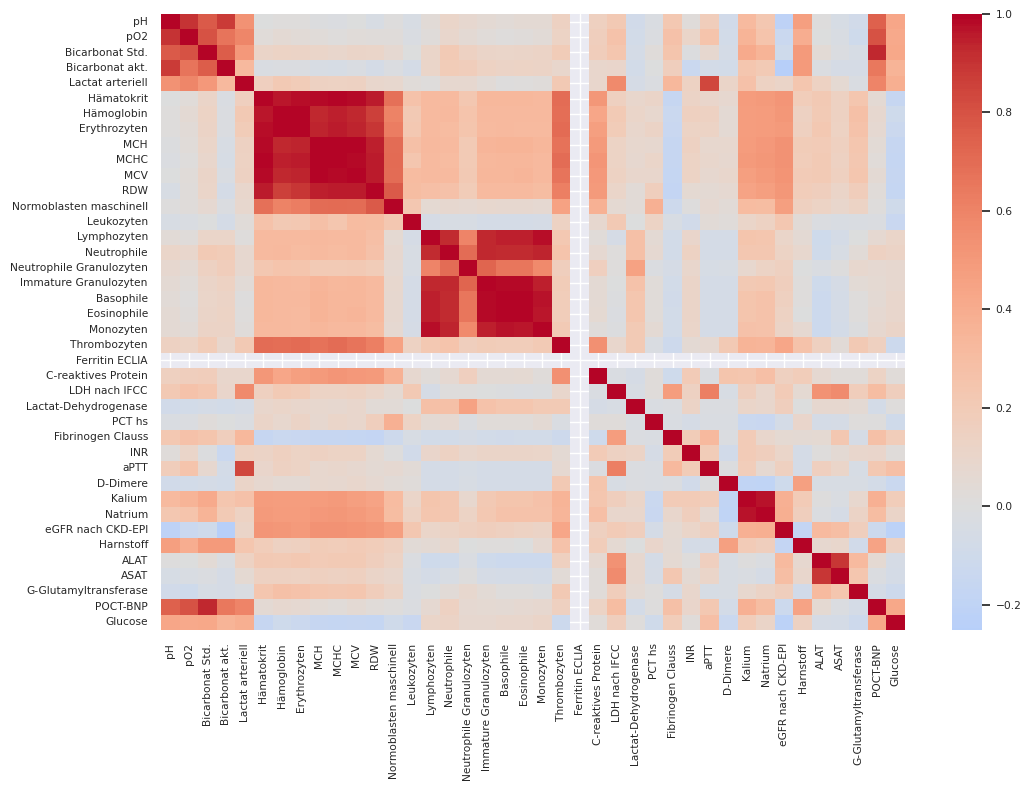

In [29]:
### Grouped features based on their laboratory family

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS


## Set the day range to be selected
init_day = 7
# end_day = 2

## Load the list of laboratory features
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_parameter_grouping.csv')
df_lab_features = pd.read_csv(filename, sep=',', header=0)

## Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, 'lab_data_exploration.csv')
filename = os.path.join(dir_path, f'116_plcp_lab_markers_day-{init_day}.csv')
# filename = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}_starting.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

## Set the 'df' columns in the order of the 'df_lab_features'
df = df.reindex(columns=df_lab_features['lab_parameter'].tolist())

## Set the df without the first two columns
df = df.iloc[:, 2:].copy()

## Set NaN values to 0
df = df.fillna(-1)

# Standardize the data before calculating distances
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calculate pairwise distances using Euclidean distance
similarities = pairwise_distances(scaled_data, metric='euclidean')

# Multidimensional scaling
seed = np.random.RandomState(seed=3)
mds = MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed, dissimilarity='precomputed', n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)

# Features as a heatmap
corr = df.corr()

# Set up the matplotlib figure, adjust size
plt.figure(figsize=(12, 8))

# Draw the heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", center=0)

plt.show()

### Sort features based on their average similarity distances

/home/jagh/anaconda3/envs/patientomics/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: >

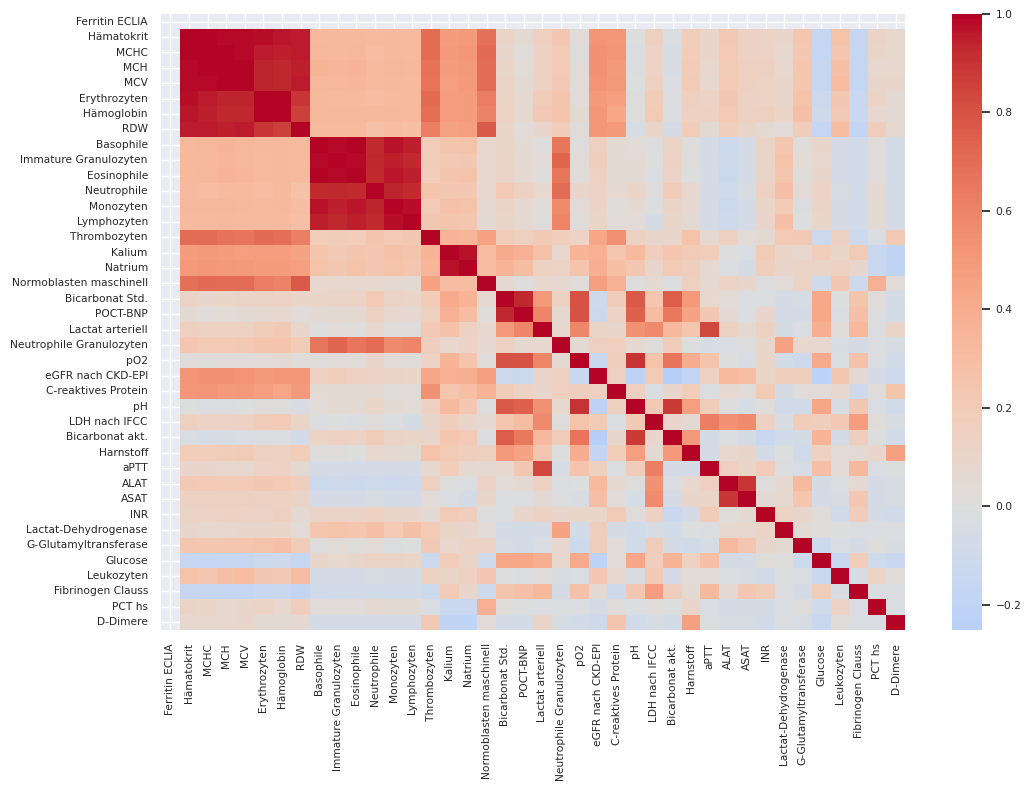

In [30]:
### Sort features based on their average similarity distances

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS


## Set the day range to be selected
init_day = 7
# end_day = 2

## Load the list of laboratory features
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_parameter_grouping.csv')
df_lab_features = pd.read_csv(filename, sep=',', header=0)

# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, 'lab_data_exploration.csv')
# filename = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{days_col}.csv')
# filename = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}_starting.csv')
filename = os.path.join(dir_path, f'116_plcp_lab_markers_day-{init_day}.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

## Set the 'df' columns in the order of the 'df_lab_features'
df = df.reindex(columns=df_lab_features['lab_parameter'].tolist())

## Set the df without the first two columns
df = df.iloc[:, 2:].copy()

## Set NaN values to 0
df = df.fillna(-1)

# Standardize the data before calculating distances
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calculate pairwise distances using Euclidean distance
similarities = pairwise_distances(scaled_data.T, metric='euclidean')  # Transpose to get feature distances

# Calculate average similarity distance for each feature
average_distances = np.mean(similarities, axis=0)

# Sort features based on their average similarity distances
sorted_indices = np.argsort(average_distances)
sorted_features = df.columns[sorted_indices]

# Reorder the dataframe columns based on sorted features
sorted_df = df[sorted_features]

# Multidimensional scaling
seed = np.random.RandomState(seed=3)
mds = MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed, dissimilarity='precomputed', n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)

# Features as a heatmap
corr = sorted_df.corr()

# Set up the matplotlib figure, adjust size
plt.figure(figsize=(12, 8))

# Draw the heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", center=0)


## Cluster map to visualize data patterns among potential long COVID patients (N = 116)

Number of NaN values: 0
Number of infinite values: 0


/home/jagh/anaconda3/envs/patientomics/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/jagh/anaconda3/envs/patientomics/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1500x1000 with 0 Axes>

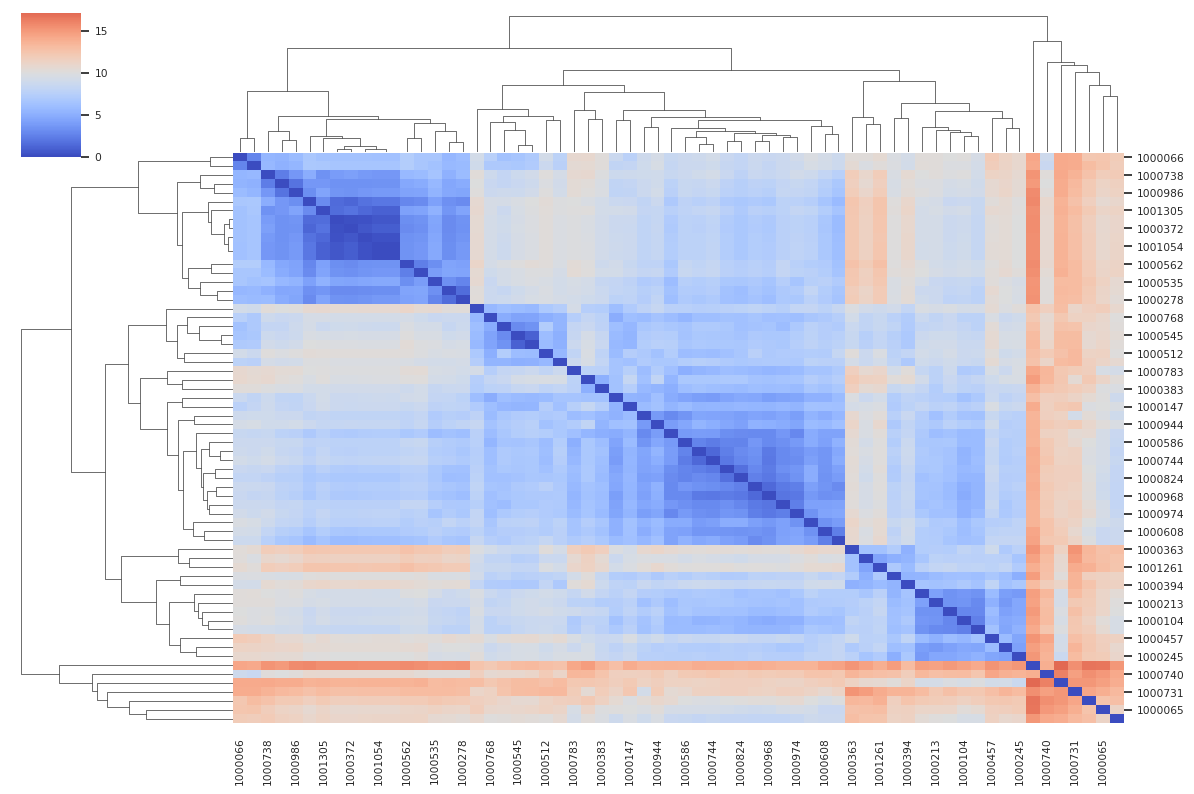

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler



## Set the day range to be selected
init_day = 7
# end_day = 2

## Load the list of laboratory features
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_parameter_grouping.csv')
df_lab_features = pd.read_csv(filename, sep=',', header=0)

# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, 'lab_data_exploration.csv')
# filename = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{days_col}.csv')
# filename = os.path.join(dir_path, f'116_plcp_lab_markers_day_Imputed-{init_day}_to_{end_day}_starting.csv')
filename = os.path.join(dir_path, f'116_plcp_lab_markers_day-{init_day}.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

## Set the 'df' columns in the order of the 'df_lab_features'
df = df.reindex(columns=df_lab_features['lab_parameter'].tolist())

## Set the df without the first two columns
df = df.iloc[:, 2:].copy()

## Set NaN values to 0
df = df.fillna(-1)

# Extract the feature columns and sample data
feature_names = df.columns
samples = df.values

# Extract patients ids
patient_ids = df.index.values

# Standardize the data before calculating distances
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

# Calculate pairwise Euclidean distances
similarities = euclidean_distances(scaled_samples)

# Debugging: Output non-finite values in the similarities matrix
nan_count = np.sum(np.isnan(similarities))
inf_count = np.sum(np.isinf(similarities))
print("Number of NaN values:", nan_count)
print("Number of infinite values:", inf_count)

# Replace NaN with infinity
similarities[np.isnan(similarities)] = np.inf

# Create a DataFrame with the similarities and feature names
similarities_df = pd.DataFrame(similarities, columns=patient_ids, index=patient_ids)

# Set up the matplotlib figure, make it big!
plt.figure(figsize=(15, 10))

# Create a cluster map using seaborn
sns.clustermap(similarities_df, cmap='coolwarm', method='average', metric='euclidean', figsize=(12, 8), center=10)

plt.show()

In [23]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from scipy.cluster import hierarchy

# def hierarchical_clustering(df, method='average', metric='euclidean', figsize=(12, 8), center=10):
#     # Set NaN values to 0
#     df = df.fillna(0)

#     # Extract the feature columns and sample data
#     feature_names = df.columns
#     samples = df.values

#     # Extract patients ids
#     patient_ids = df.index.values

#     # Standardize the data before calculating distances
#     scaler = StandardScaler()
#     scaled_samples = scaler.fit_transform(samples)

#     # Calculate pairwise Euclidean distances
#     similarities = hierarchy.linkage(scaled_samples, method=method, metric=metric)

#     # Set up the matplotlib figure
#     plt.figure(figsize=figsize)

#     # Create a dendrogram with patients on the y-axis
#     hierarchy.dendrogram(similarities, labels=patient_ids, orientation='left', leaf_font_size=8)

#     # Show the dendrogram
#     plt.title(f'Hierarchical Clustering Dendrogram ({method}, {metric})')
#     plt.xlabel('Distance')
#     plt.ylabel('Patients')

#     plt.show()



# ## Set the day range to be selected
# init_day = 0
# end_day = 2

# ## Load the list of laboratory features
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, 'lab_parameter_grouping.csv')
# df_lab_features = pd.read_csv(filename, sep=',', header=0)

# # Load data
# dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
# filename = os.path.join(dir_path, f'116_plcp_lab_markers_day-{init_day}.csv')
# df = pd.read_csv(filename, sep=',', header=0, index_col=0)

# ## Set the 'df' columns in the order of the 'df_lab_features'
# df = df.reindex(columns=df_lab_features['lab_parameter'].tolist())

# ## Set the df without the first two columns
# df = df.iloc[:, 2:].copy()

# ## Set NaN values to 0
# df = df.fillna(-1)

# # Call the hierarchical_clustering function
# hierarchical_clustering(df, method='average', metric='euclidean', figsize=(12, 30), center=10)

In [1]:
#pip install pydendroheatmap
cd /pydendroheatmap
python setup.py install

SyntaxError: invalid syntax (1439735907.py, line 3)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import dendroheatmap as dhm

def hierarchical_clustering(df, method='average', metric='euclidean', figsize=(12, 8), center=10):
    # Set NaN values to 0
    df = df.fillna(0)

    # Extract the feature columns and sample data
    feature_names = df.columns
    samples = df.values

    # Extract patients ids
    patient_ids = df.index.values

    # Standardize the data before calculating distances
    scaler = StandardScaler()
    scaled_samples = scaler.fit_transform(samples)

    # Calculate pairwise Euclidean distances
    similarities = hierarchy.linkage(scaled_samples, method=method, metric=metric)

    # Create a hierarchical clustering dendrogram
    plt.figure(figsize=figsize)
    hierarchy.dendrogram(similarities, labels=patient_ids, orientation='left', leaf_font_size=8)
    plt.title(f'Hierarchical Clustering Dendrogram ({method}, {metric})')
    plt.xlabel('Distance')
    plt.ylabel('Patients')
    plt.show()

    # Create a dendroheatmap
    plt.figure(figsize=figsize)
    heatmap = dhm.DendroHeatMap(df, row_linkage=similarities, col_linkage=similarities)
    heatmap.plot(cbar=True, scale_axis='row', cmap='coolwarm', center=center)
    plt.title(f'Hierarchical Clustering DendroHeatMap ({method}, {metric})')
    plt.xlabel('Features')
    plt.show()

# Set the day range to be selected
init_day = 0
end_day = 2

# Load the list of laboratory features
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_parameter_grouping.csv')
df_lab_features = pd.read_csv(filename, sep=',', header=0)

# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, f'116_plcp_lab_markers_day-{init_day}.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

# Set the 'df' columns in the order of the 'df_lab_features'
df = df.reindex(columns=df_lab_features['lab_parameter'].tolist())

# Set the df without the first two columns
df = df.iloc[:, 2:].copy()

# Set NaN values to 0
df = df.fillna(-1)

# Call the hierarchical_clustering function
hierarchical_clustering(df, method='average', metric='euclidean', figsize=(12, 30), center=10)


ModuleNotFoundError: No module named 'dendroheatmap'

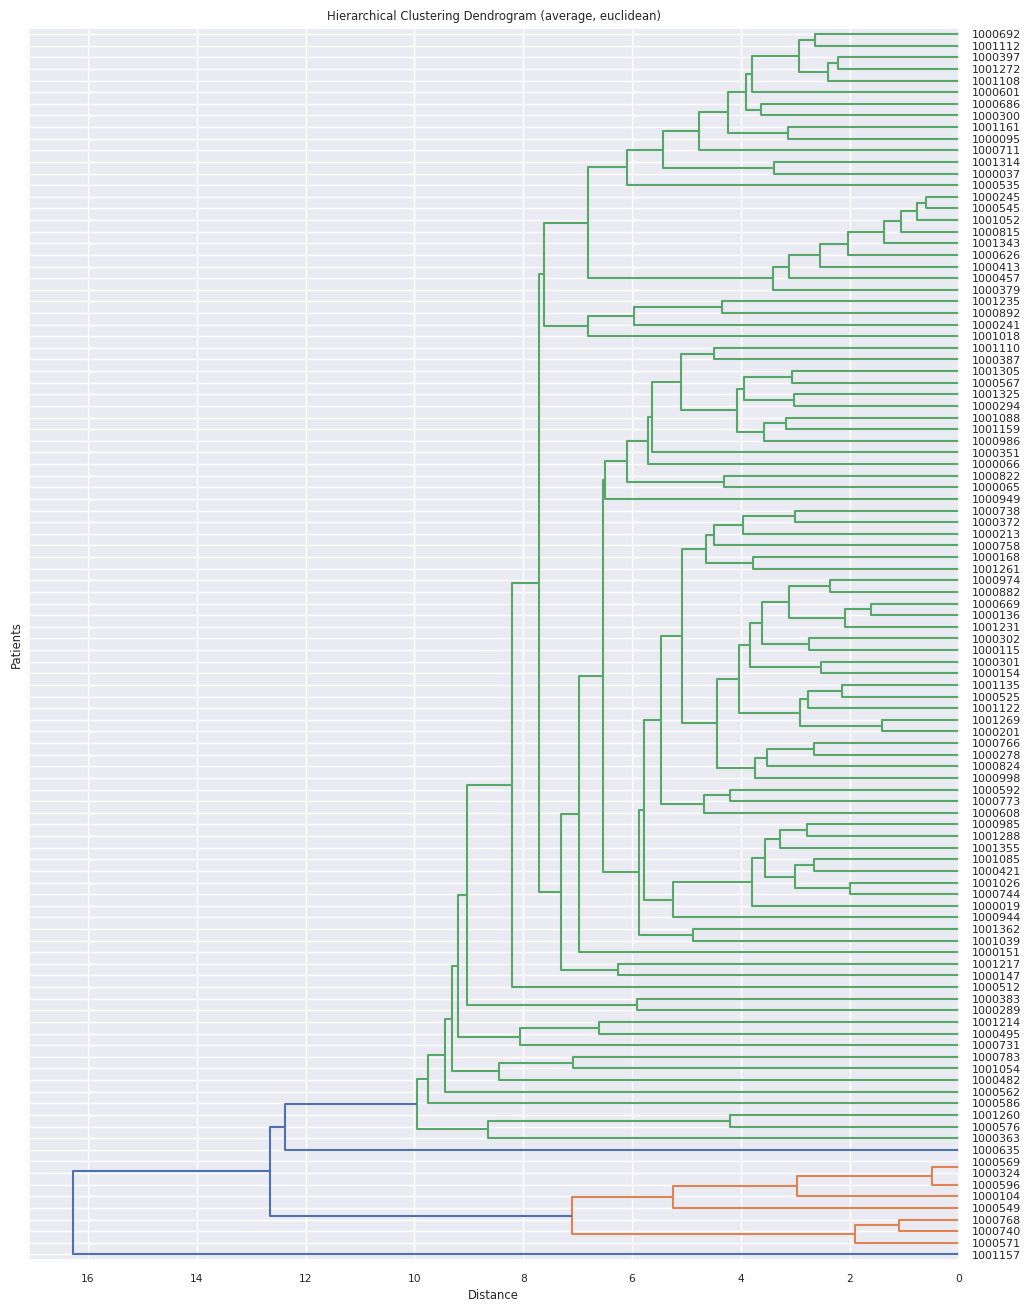

<Figure size 1200x1600 with 0 Axes>

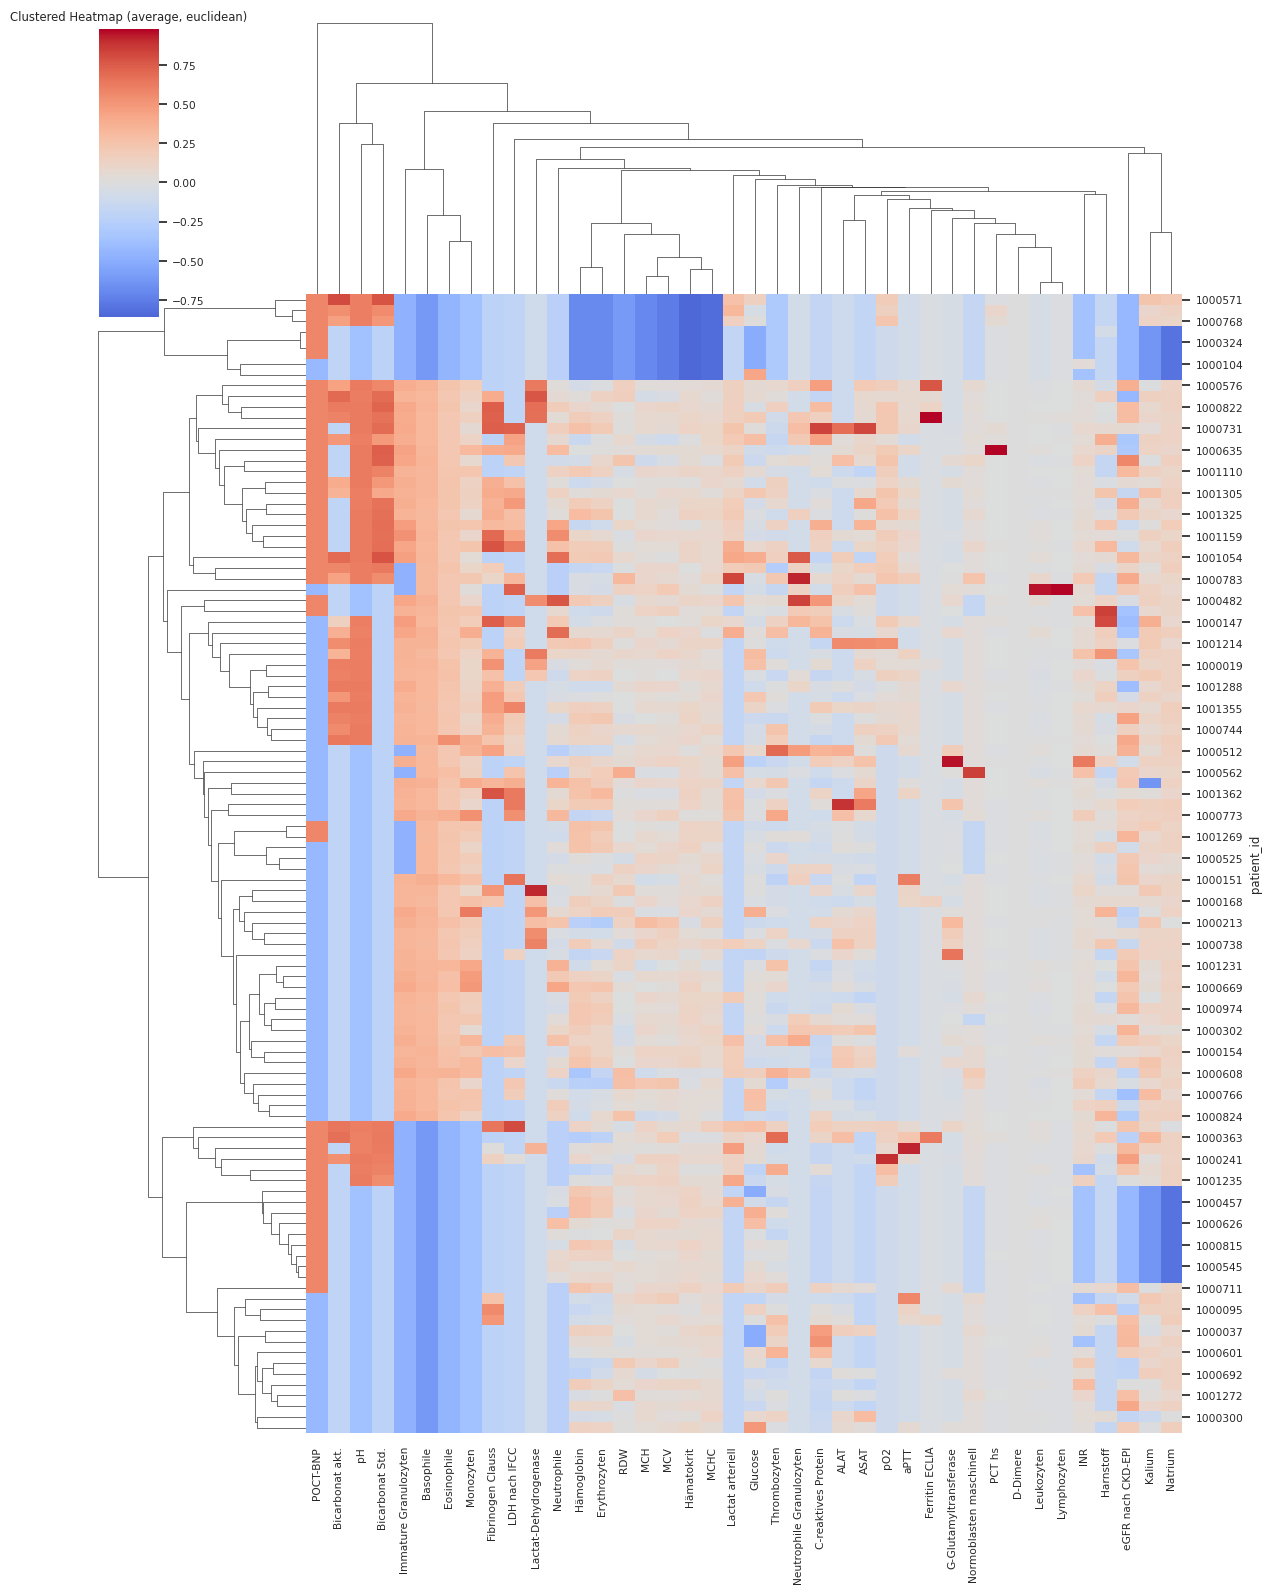

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import seaborn as sns

def hierarchical_clustering(df, method='average', metric='euclidean', figsize=(12, 8), center=10):
    # Set NaN values to 0
    df = df.fillna(0)

    # Extract the feature columns and sample data
    feature_names = df.columns
    samples = df.values

    # Extract patients ids
    patient_ids = df.index.values

    # Standardize the data before calculating distances
    scaler = StandardScaler()
    scaled_samples = scaler.fit_transform(samples)

    # Calculate pairwise Euclidean distances
    similarities = hierarchy.linkage(scaled_samples, method=method, metric=metric)

    # Create a hierarchical clustering dendrogram
    plt.figure(figsize=figsize)
    hierarchy.dendrogram(similarities, labels=patient_ids, orientation='left', leaf_font_size=8)
    plt.title(f'Hierarchical Clustering Dendrogram ({method}, {metric})')
    plt.xlabel('Distance')
    plt.ylabel('Patients')
    plt.show()

    # Create a clustered heatmap using seaborn
    sns.set(font_scale=0.7)
    plt.figure(figsize=figsize)
    sns.clustermap(df, method=method, metric=metric, cmap='coolwarm', figsize=figsize, center=center)
    plt.title(f'Clustered Heatmap ({method}, {metric})')
    plt.show()

# Set the day range to be selected
init_day = 0
# end_day = 2

# Load the list of laboratory features
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_parameter_grouping-COPY.csv')
df_lab_features = pd.read_csv(filename, sep=',', header=0)

# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, f'116_plcp_lab_markers_day-{init_day}.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

# Set the 'df' columns in the order of the 'df_lab_features'
df = df.reindex(columns=df_lab_features['lab_parameter'].tolist())

# Set the df without the first two columns
df = df.iloc[:, 2:].copy()

# Set NaN values to 0
df = df.fillna(-1)

## Normalize the data
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

# Call the hierarchical_clustering function
hierarchical_clustering(df, method='average', metric='euclidean', figsize=(12, 16), center=0)

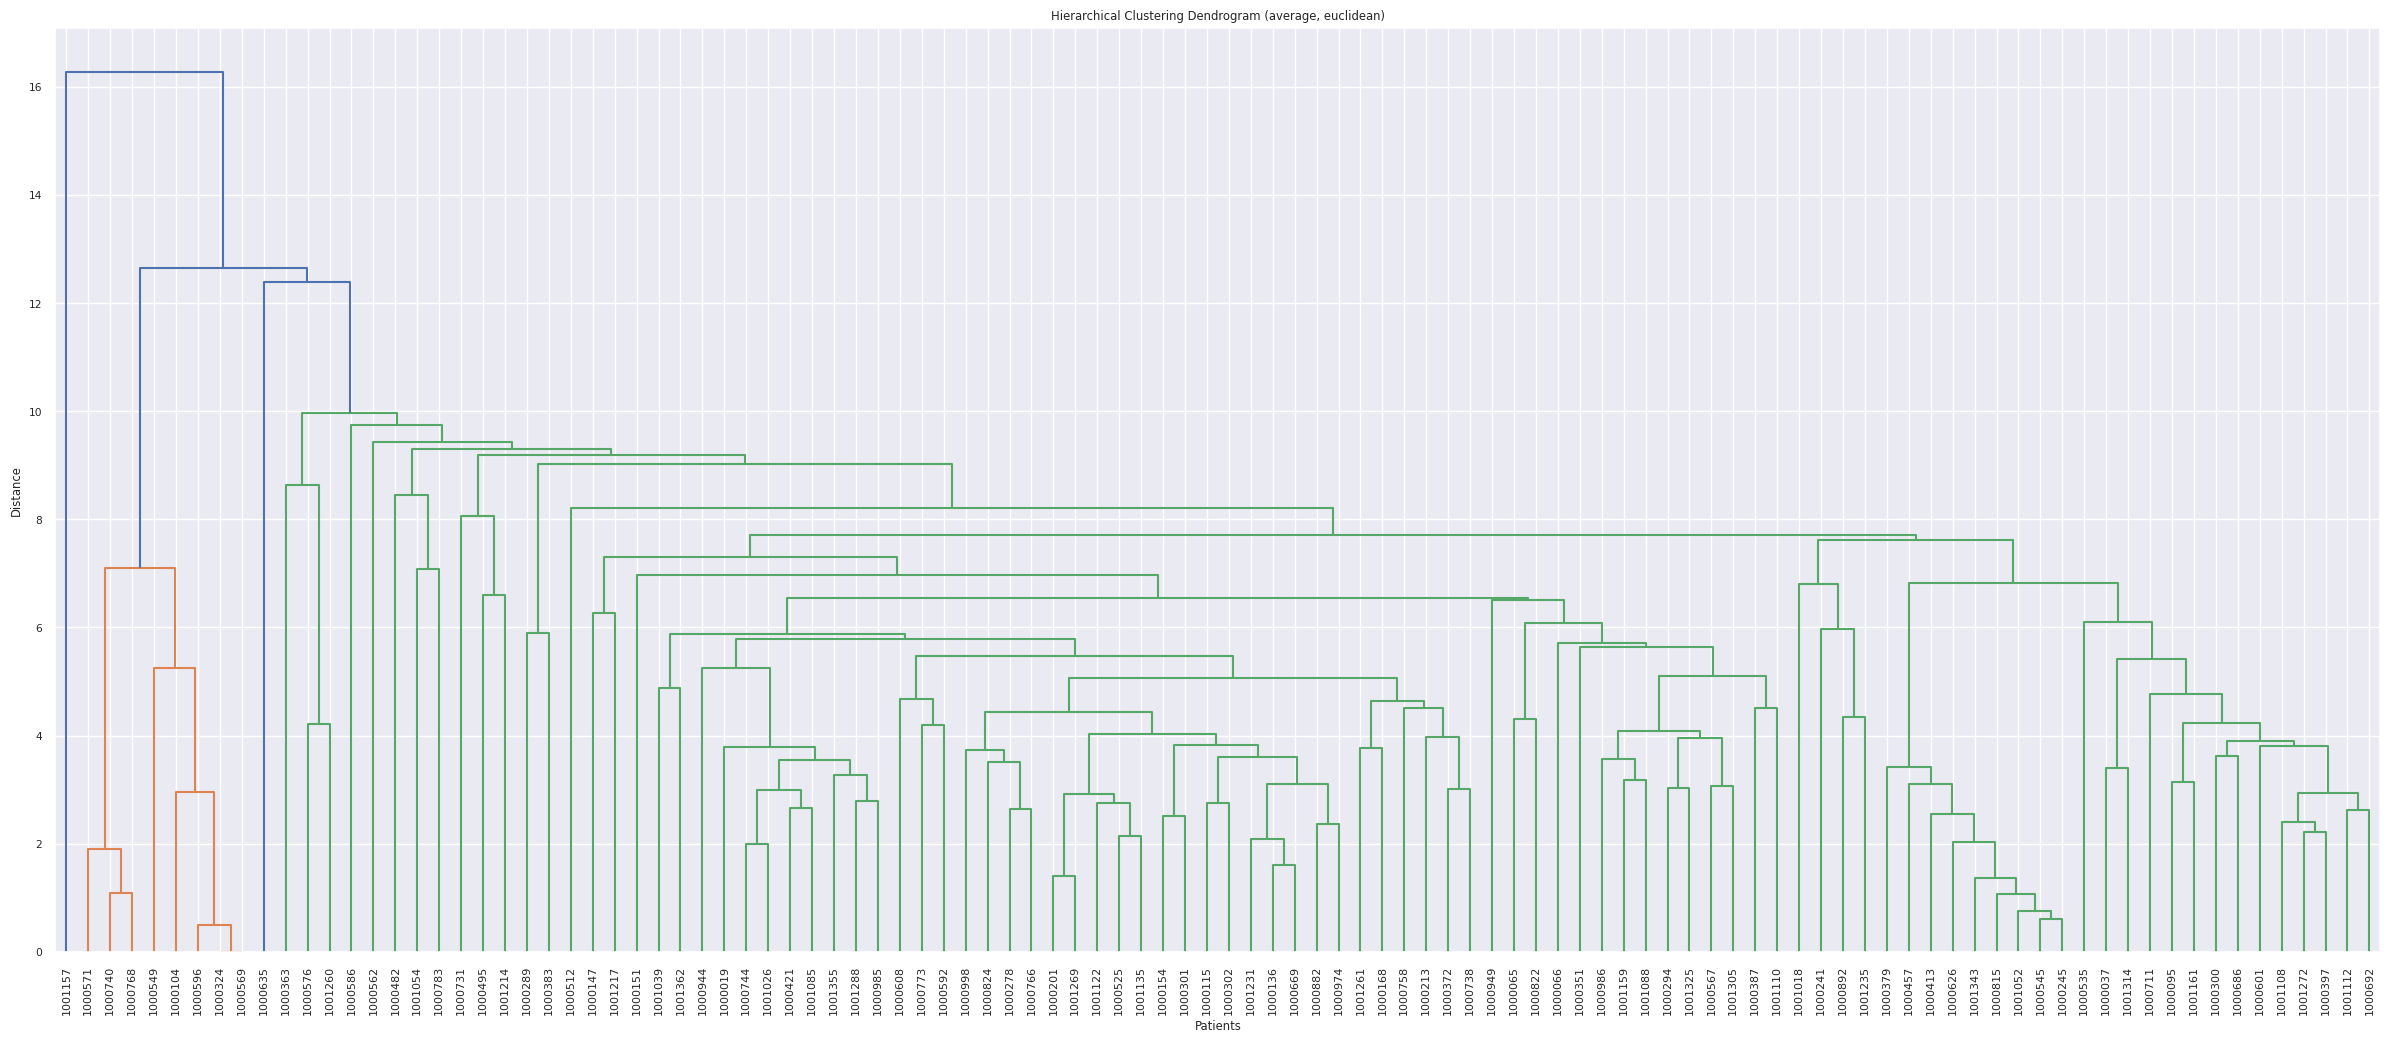

<Figure size 3000x1200 with 0 Axes>

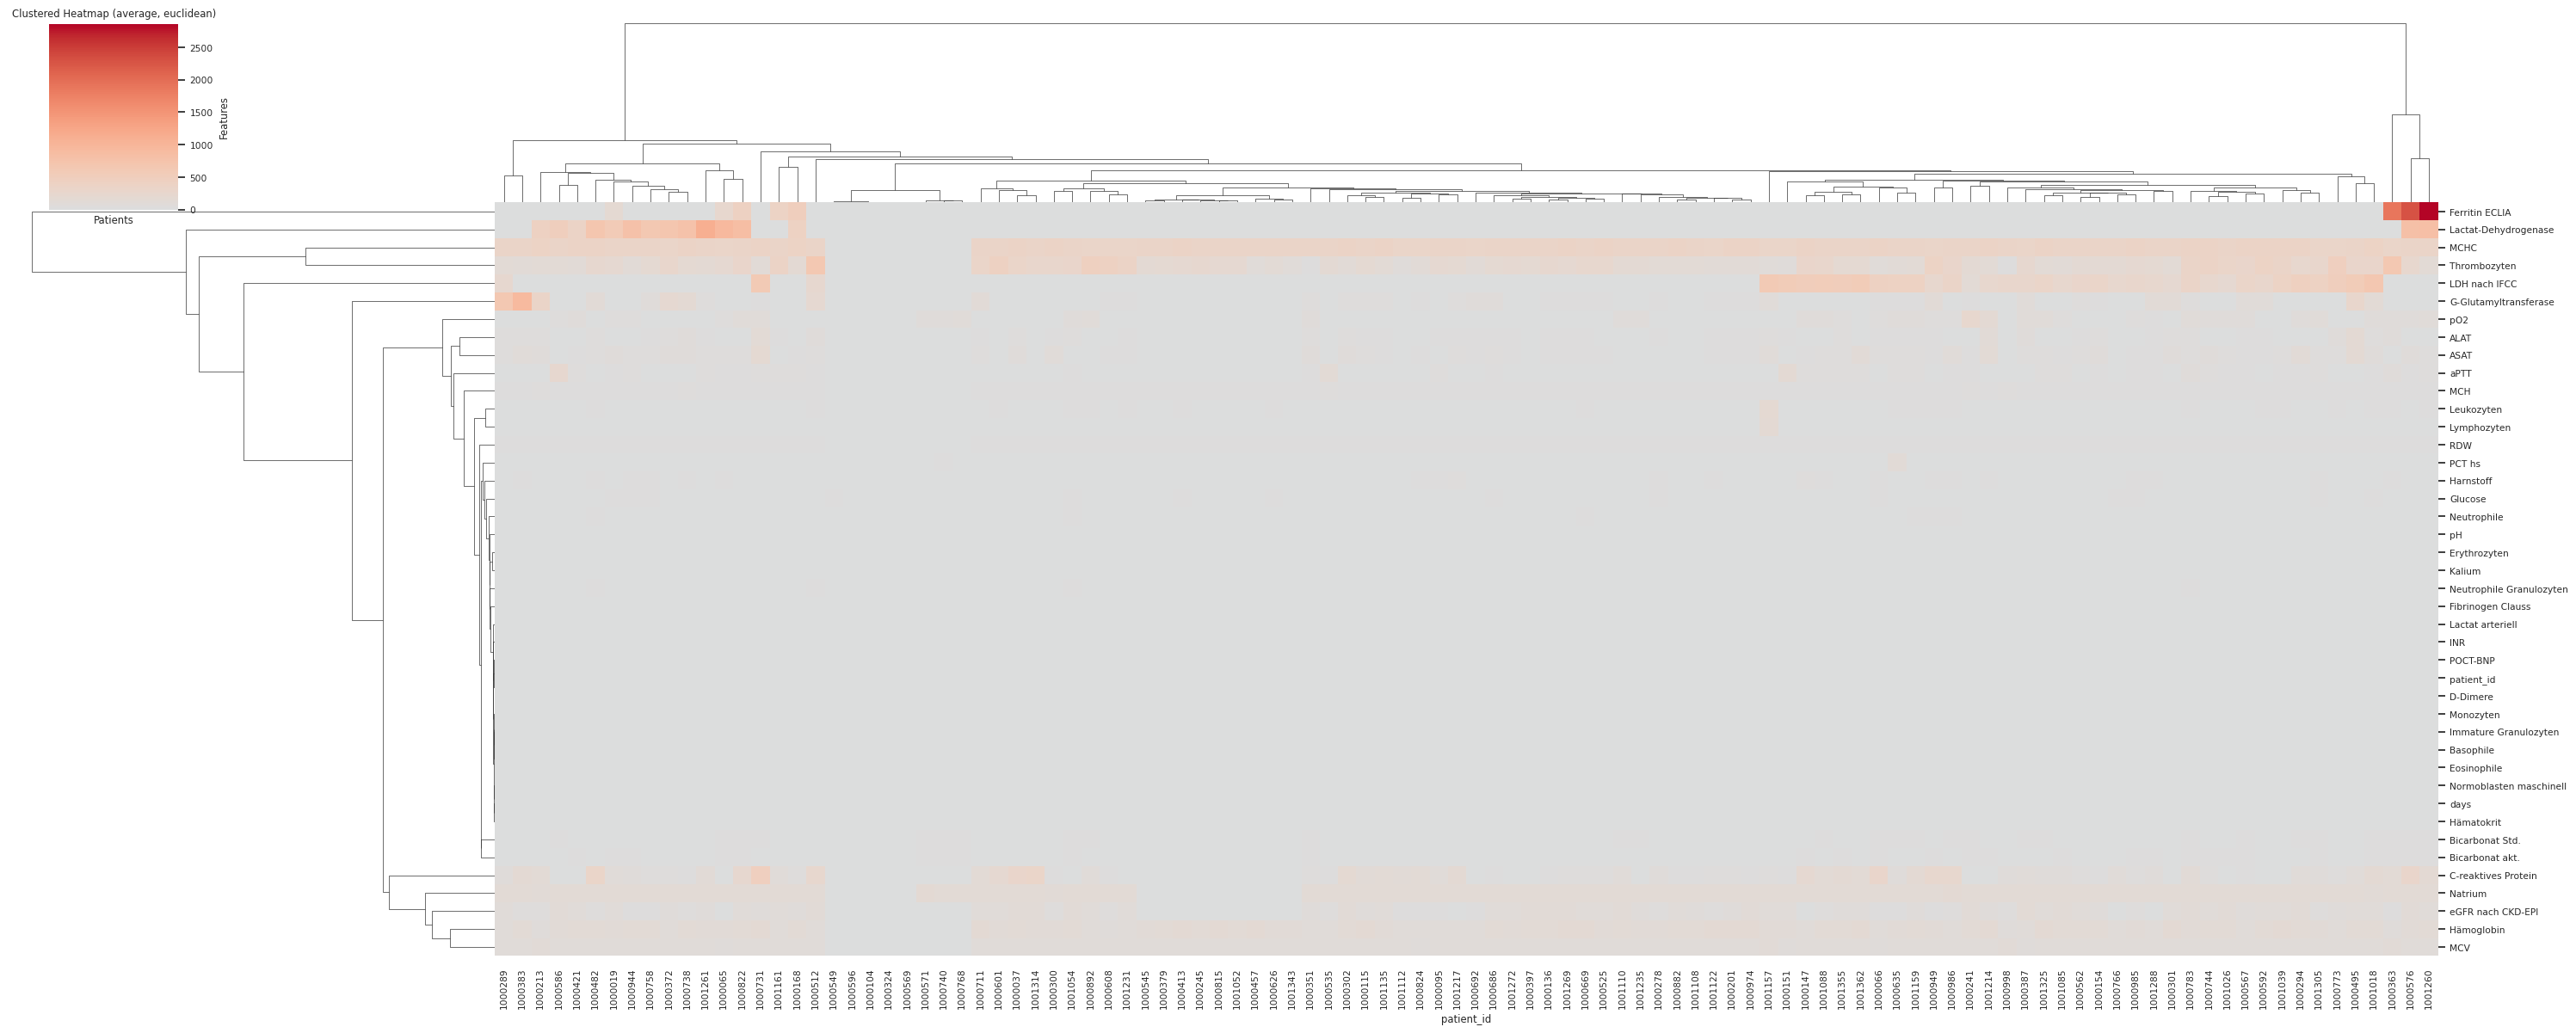

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import seaborn as sns

def hierarchical_clustering(df, method='average', metric='euclidean', figsize=(12, 8), center=10):
    # Set NaN values to 0
    df = df.fillna(0)

    # Extract the feature columns and sample data
    feature_names = df.columns
    samples = df.values

    # Extract patients ids
    patient_ids = df.index.values

    # Standardize the data before calculating distances
    scaler = StandardScaler()
    scaled_samples = scaler.fit_transform(samples)

    # Calculate pairwise Euclidean distances
    similarities = hierarchy.linkage(scaled_samples, method=method, metric=metric)

    # Create a hierarchical clustering dendrogram
    plt.figure(figsize=figsize)
    hierarchy.dendrogram(similarities, labels=patient_ids, orientation='top', leaf_font_size=8)
    plt.title(f'Hierarchical Clustering Dendrogram ({method}, {metric})')
    plt.xlabel('Patients')
    plt.ylabel('Distance')
    plt.show()

    # Create a clustered heatmap using seaborn with patients on the x-axis and features on the y-axis
    sns.set(font_scale=0.7)
    plt.figure(figsize=figsize)
    sns.clustermap(df.T, method=method, metric=metric, cmap='coolwarm', figsize=figsize, center=center)
    plt.title(f'Clustered Heatmap ({method}, {metric})')
    plt.xlabel('Patients')
    plt.ylabel('Features')
    plt.show()

# Set the day range to be selected
init_day = 0
end_day = 2

# Load the list of laboratory features
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_parameter_grouping.csv')
df_lab_features = pd.read_csv(filename, sep=',', header=0)

# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, f'116_plcp_lab_markers_day-{init_day}.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

# Set the 'df' columns in the order of the 'df_lab_features'
df = df.reindex(columns=df_lab_features['lab_parameter'].tolist())

# Set NaN values to 0
df = df.fillna(-1)

# Call the hierarchical_clustering function
hierarchical_clustering(df, method='average', metric='euclidean', figsize=(30, 12), center=10)

## Computing the PCA to visualize data patterns among potential long COVID patients (N = 116)

Number of NaN values: 0
Number of infinite values: 0


<Figure size 1500x1000 with 0 Axes>

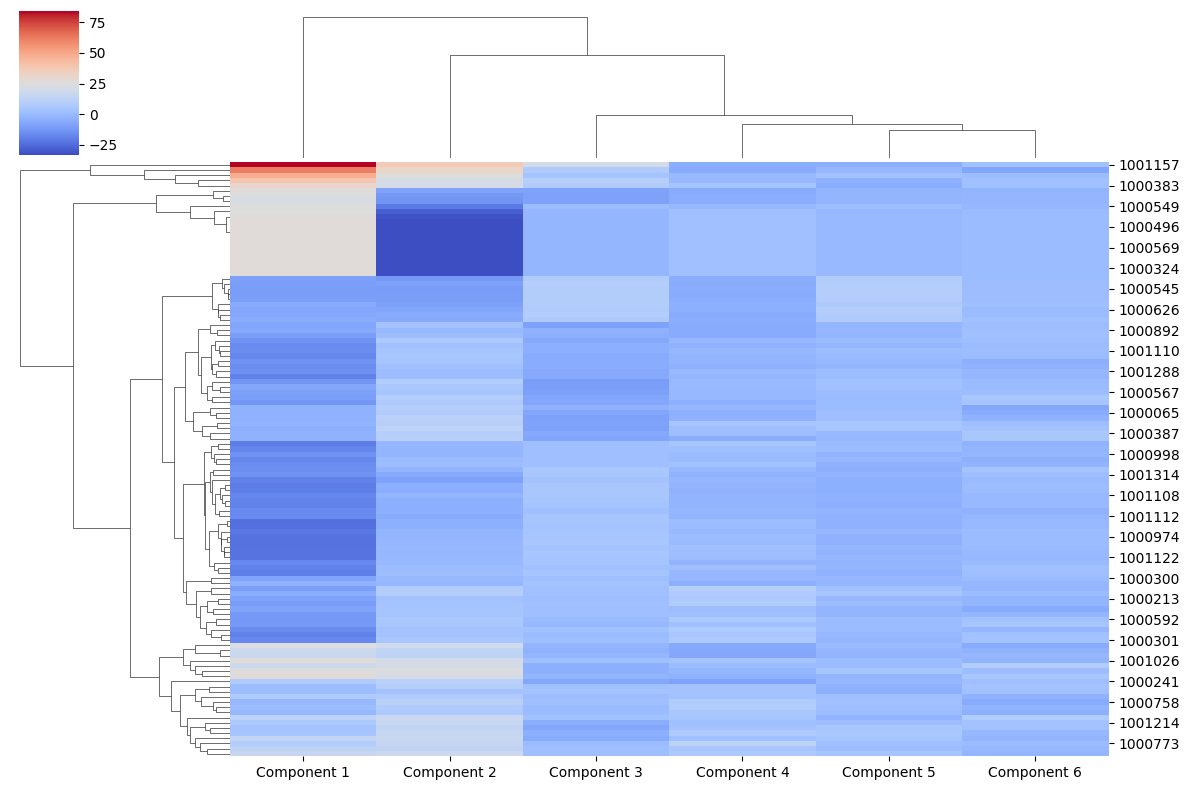

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_data_exploration.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

# Extract the feature columns and sample data
feature_names = df.columns
samples = df.values

# Extract patients ids
patient_ids = df.index.values

# Standardize the data before calculating distances
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

# Calculate pairwise Euclidean distances
similarities = euclidean_distances(scaled_samples)

# Debugging: Output non-finite values in the similarities matrix
nan_count = np.sum(np.isnan(similarities))
inf_count = np.sum(np.isinf(similarities))
print("Number of NaN values:", nan_count)
print("Number of infinite values:", inf_count)

# Replace NaN with infinity
similarities[np.isnan(similarities)] = np.inf

# Multidimensional scaling
seed = np.random.RandomState(seed=3)
mds = PCA(n_components=6, random_state=seed)  # Using 6 components
pos = mds.fit_transform(similarities)

# Create a DataFrame with the MDS positions and patient IDs
mds_df = pd.DataFrame(pos, columns=[f'Component {i+1}' for i in range(6)], index=patient_ids)

# Set up the matplotlib figure, make it big!
plt.figure(figsize=(15, 10))

# Create a cluster map using seaborn
# sns.clustermap(mds_df, cmap='viridis', method='average', metric='euclidean', figsize=(12, 8))

## Stablish 0 as the center of the heatmap
sns.clustermap(mds_df, cmap='coolwarm', method='average', metric='euclidean', figsize=(12, 8), center=25)

plt.show()

/tmp/ipykernel_40900/1962119126.py:33: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  patient_linkage = hierarchy.linkage(similarities, method='average', metric='euclidean')
/tmp/ipykernel_40900/1962119126.py:53: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  feature_linkage = hierarchy.linkage(feature_similarities, method='average', metric='euclidean')


<Figure size 1500x1000 with 0 Axes>

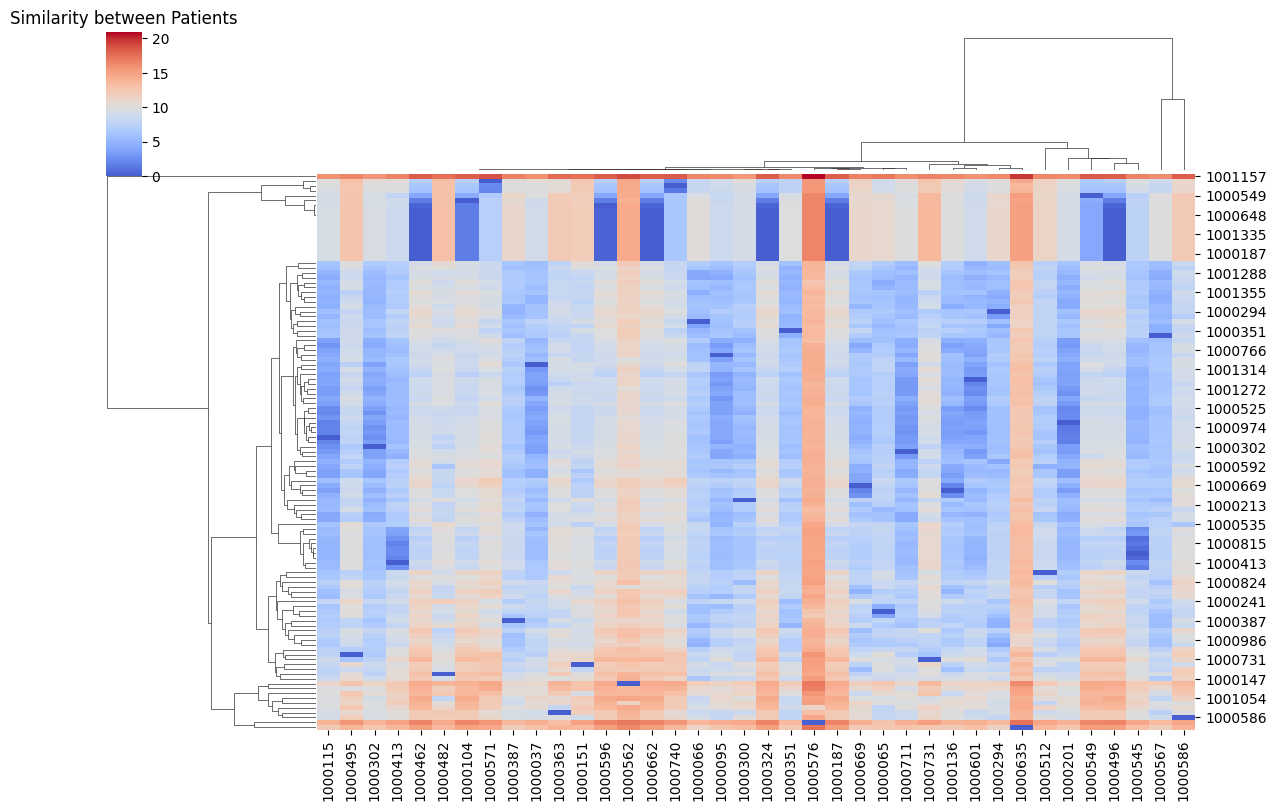

Sorted Feature Names: Index(['Hämatokrit', 'Monozyten', 'Normoblasten maschinell',
       'Immature Granulozyten', 'Basophile', 'Eosinophile', 'Lactat arteriell',
       'INR', 'Neutrophile Granulozyten', 'pH', 'Neutrophile', 'Erythrozyten',
       'Kalium', 'PCT hs', 'Harnstoff', 'Glucose', 'Bicarbonat Std.',
       'Bicarbonat akt.', 'RDW', 'Leukozyten', 'Lymphozyten', 'aPTT', 'MCH',
       'ALAT', 'pO2', 'ASAT', 'G-Glutamyltransferase', 'Hämoglobin', 'Natrium',
       'MCV', 'eGFR', 'Ferritin', 'MCHC', 'Lactat-Dehydrogenase',
       'Thrombozyten', 'LDH', 'Fibrinogen Clauss', 'D-Dimere'],
      dtype='object')


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy

# Load data
dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/01_preprocessing_116_PLCP/'
filename = os.path.join(dir_path, 'lab_data_exploration.csv')
df = pd.read_csv(filename, sep=',', header=0, index_col=0)

# Extract the feature columns and sample data
feature_names = df.columns
samples = df.values

# Extract patients ids
patient_ids = df.index.values

# Standardize the data before calculating distances
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

# Calculate pairwise Euclidean distances
similarities = euclidean_distances(scaled_samples)

# Replace NaN with infinity
similarities[np.isnan(similarities)] = np.inf

# Calculate linkage for hierarchical clustering of patients
patient_linkage = hierarchy.linkage(similarities, method='average', metric='euclidean')

# Get the order of patients based on the clustering
patient_order = hierarchy.leaves_list(patient_linkage)

# Sort patient IDs according to the clustering order
sorted_patient_ids = patient_ids[patient_order]

# Create a DataFrame with the similarities and sorted patient IDs
# similarities_df = pd.DataFrame(similarities, columns=sorted_patient_ids, index=sorted_patient_ids)
# similarities_df = pd.DataFrame(similarities, columns=sorted_patient_ids, index=sorted_patient_ids)
similarities_df = pd.DataFrame(similarities, columns=patient_ids, index=patient_ids)

# Calculate the similarity matrix for features
feature_similarities = euclidean_distances(samples.T)

# Replace NaN with infinity
feature_similarities[np.isnan(feature_similarities)] = np.inf

# Calculate linkage for hierarchical clustering of features
feature_linkage = hierarchy.linkage(feature_similarities, method='average', metric='euclidean')

# Get the order of features based on the clustering
feature_order = hierarchy.leaves_list(feature_linkage)

# Sort feature names according to the clustering order
sorted_feature_names = feature_names[feature_order]

# Set up the matplotlib figure, make it big!
plt.figure(figsize=(15, 10))

# Create a cluster map using seaborn
sns.clustermap(similarities_df, cmap='coolwarm', row_cluster=True, col_cluster=True, center=10,
               row_linkage=patient_linkage, col_linkage=feature_linkage,
               figsize=(12, 8), cbar_pos=(0.02, 0.8, 0.03, 0.18))

# Add sorted feature names to the plot
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Similarity between Patients")

# Show the plot
plt.show()

# Display sorted feature names
print("Sorted Feature Names:", sorted_feature_names)

In [2]:
from tslearn.utils import to_time_series_dataset
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2]
my_third_time_series = [1, 2, 4, 2, 2]
X = to_time_series_dataset([my_first_time_series,
                                my_second_time_series,
                                my_third_time_series])
y = [0, 1, 1]

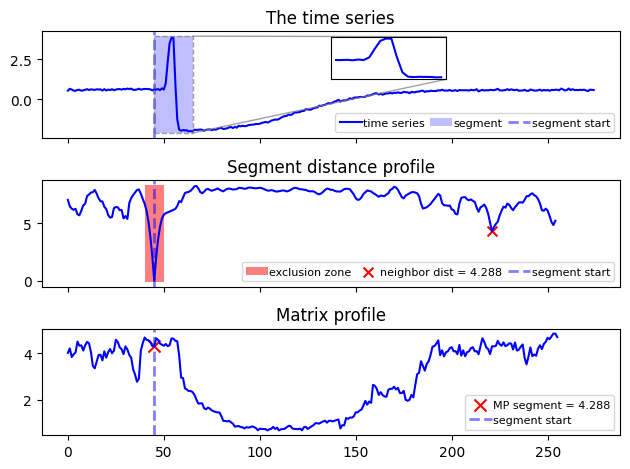

In [3]:
import numpy
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.matrix_profile import MatrixProfile

import warnings
warnings.filterwarnings('ignore')

# Set a seed to ensure determinism
numpy.random.seed(42)

# Load the Trace dataset
X_train, y_train, _, _ = CachedDatasets().load_dataset("Trace")

# Normalize the time series
scaler = TimeSeriesScalerMeanVariance()
X_train = scaler.fit_transform(X_train)

# Take the first time series
ts = X_train[0, :, :]

# We will take the spike as a segment
subseq_len = 20
start = 45
segment = ts[start:start + subseq_len]

# Create our matrix profile
matrix_profiler = MatrixProfile(subsequence_length=subseq_len, scale=True)
mp = matrix_profiler.fit_transform([ts]).flatten()

# Create a grid for our plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# Plot our timeseries
ax1.plot(ts, c='b', label='time series')
ax1.add_patch(patches.Rectangle((start, numpy.min(ts) - 0.1), subseq_len,
                                numpy.max(ts) - numpy.min(ts) + 0.2,
                                facecolor='b', alpha=0.25,
                                label='segment'))
ax1.axvline(start, c='b', linestyle='--', lw=2, alpha=0.5,
            label='segment start')
ax1.legend(loc='lower right', ncol=4, fontsize=8,
           handletextpad=0.1, columnspacing=0.5)
ax1.set_title('The time series')

# Inset plot with our segment
fig_ax_in = ax1.inset_axes([0.5, 0.55, 0.2, 0.4])
fig_ax_in.plot(scaler.fit_transform(segment.reshape(1, -1, 1))[0], c='b')
ax1.indicate_inset(inset_ax=fig_ax_in, transform=ax1.transData,
                   bounds=[start, numpy.min(ts) - 0.1, subseq_len,
                           numpy.max(ts) - numpy.min(ts) + 0.2],
                   linestyle='--', alpha=0.75)
fig_ax_in.tick_params(labelleft=False, labelbottom=False)
fig_ax_in.xaxis.set_visible(False)
fig_ax_in.yaxis.set_visible(False)

# Calculate a distance profile, which represents the distance from each
# subsequence of the time series and the segment
distances = []
for i in range(len(ts) - subseq_len):
    scaled_ts = scaler.fit_transform(ts[i:i+subseq_len].reshape(1, -1, 1))
    scaled_segment = scaler.fit_transform(segment.reshape(1, -1, 1))
    distances.append(numpy.linalg.norm(scaled_ts - scaled_segment))

# Mask out the distances in the trivial match zone, get the nearest
# neighbor and put the old distances back in place so we can plot them.
distances = numpy.array(distances)
mask = list(range(start - subseq_len // 4, start + subseq_len // 4))
old_distances = distances[mask]
distances[mask] = numpy.inf
nearest_neighbor = numpy.argmin(distances)
dist_nn = distances[nearest_neighbor]
distances[mask] = old_distances

# Plot our distance profile
ax2.plot(distances, c='b')
ax2.set_title('Segment distance profile')
dist_diff = numpy.max(distances) - numpy.min(distances)
ax2.add_patch(patches.Rectangle((start - subseq_len // 4,
                                 numpy.min(distances) - 0.1),
                                subseq_len // 2,
                                dist_diff + 0.2,
                                facecolor='r', alpha=0.5,
                                label='exclusion zone'))
ax2.scatter(nearest_neighbor, dist_nn, c='r', marker='x', s=50,
            label='neighbor dist = {}'.format(numpy.around(dist_nn, 3)))
ax2.axvline(start, c='b', linestyle='--', lw=2, alpha=0.5,
            label='segment start')
ax2.legend(loc='lower right', fontsize=8, ncol=3,
           handletextpad=0.1, columnspacing=0.5)

# Plot our matrix profile
ax3.plot(mp, c='b')
ax3.set_title('Matrix profile')
ax3.scatter(start, mp[start],
            c='r', marker='x', s=75,
            label='MP segment = {}'.format(numpy.around(mp[start], 3)))
ax3.axvline(start, c='b', linestyle='--', lw=2, alpha=0.5,
            label='segment start')
ax3.legend(loc='lower right', fontsize=8,
           handletextpad=0.1, columnspacing=0.25)

plt.tight_layout()
plt.show()

In [6]:
## get pytorch version
import torch   
print(torch.__version__)

2.0.1


In [4]:
from sklearn.metrics import mean_squared_error, make_scorer
from tsai.data.external import get_Monash_regression_data
from tsai.models.MINIROCKET import MiniRocketRegressor

X_train, y_train, *_ = get_Monash_regression_data('AppliancesEnergy')
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
reg = MiniRocketRegressor(scoring=rmse_scorer)
reg.fit(X_train, y_train)
reg.save('MiniRocketRegressor')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
from sklearn.metrics import mean_squared_error
from tsai.data.external import get_Monash_regression_data
from tsai.models.MINIROCKET import load_minirocket

*_, X_test, y_test = get_Monash_regression_data('AppliancesEnergy')
reg = load_minirocket('MiniRocketRegressor')
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

2.2541492320433627

Dataset: Sunspots
downloading data...
...done. Path = data/forecasting/Sunspots.csv


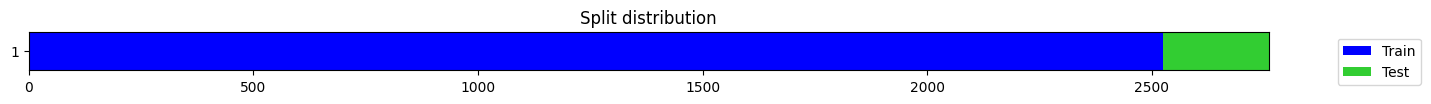

epoch,train_loss,valid_loss,mae,time
0,4283.283691,7885.240234,74.208511,00:27
1,4159.529785,7795.959961,73.742958,00:25
2,4073.178223,7624.760742,72.831734,00:33
3,3996.732666,7300.795898,71.109566,00:24
4,3872.768311,6668.985840,67.802582,00:29
5,3743.353271,5531.466797,61.970184,00:23
6,3550.201416,4423.143066,56.092728,00:23
7,3314.846924,3360.042480,49.304558,00:24
8,3052.958984,2869.111084,45.391304,00:28
9,2773.725342,2273.097412,40.807400,00:26


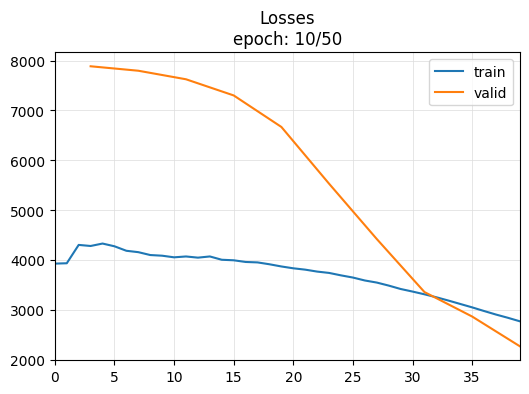

KeyboardInterrupt: 

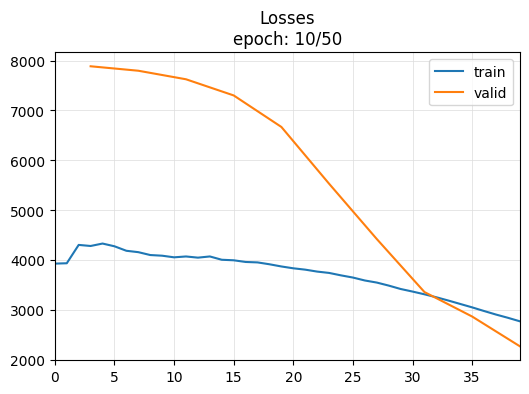

In [6]:
from tsai.basics import *

ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=1)(ts)
splits = TimeSplitter(235)(y) 
tfms = [None, TSForecasting()]
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch="TSTPlus", metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)
fcst.export("fcst.pkl")

In [10]:
import sklearn
from tsai.basics import *
my_setup(sklearn)

## https://github.com/timeseriesAI/tsai/blob/main/tutorial_nbs/15_PatchTST_a_new_transformer_for_LTSF.ipynb

os              : Linux-6.2.0-32-generic-x86_64-with-glibc2.35
python          : 3.9.16
tsai            : 0.3.7
fastai          : 2.7.12
fastcore        : 1.5.29
sklearn         : 1.2.2
torch           : 2.0.1
cpu cores       : 6
threads per cpu : 2
RAM             : 62.44 GB
GPU memory      : [3.82] GB
